# 01_data_and_model.ipynb

This notebook generates synthetic data for carbon footprint,
trains a regression model to predict CO₂ emissions,
evaluates it, and saves both the dataset and model for later use.



In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import joblib

# Make sure directories exist
os.makedirs("../data", exist_ok=True)
os.makedirs("../model", exist_ok=True)

# Fix random seed for reproducibility
RND = 42
np.random.seed(RND)

print("✅ Libraries loaded and folders ready")


✅ Libraries loaded and folders ready


In [2]:
# Number of samples
N = 5000

# Features (inputs)
energy_kwh = np.random.uniform(100, 20000, N)     # annual household electricity (kWh)
transport_km = np.random.uniform(0, 40000, N)     # annual transport distance (km)
waste_kg = np.random.uniform(0, 2000, N)          # annual waste (kg)
flights = np.random.poisson(1.2, N)               # flights per year

# Target (output: CO₂ tons per year)
co2 = (energy_kwh * 0.0002) + (transport_km * 0.00012) + (waste_kg * 0.001) + (flights * 0.7)
co2 = co2 + np.random.normal(0, 0.2, N)  # add noise

# Build DataFrame
df = pd.DataFrame({
    "energy_kwh": energy_kwh,
    "transport_km": transport_km,
    "waste_kg": waste_kg,
    "flights": flights,
    "co2_tons": co2
})

# Save dataset
df.to_csv("../data/synthetic_footprint.csv", index=False)

df.head()


,energy_kwh,transport_km,waste_kg,flights,co2_tons
0,7553.348365,15745.420811,747.281637,2,5.878804
1,19019.214698,18937.426375,665.824192,0,6.759588
2,14666.679442,34181.895728,352.307825,0,7.802783
3,12013.303836,13600.175442,1214.533340,0,5.085563
4,3204.770945,34785.987392,953.248321,0,6.207283


               count          mean           std         min          25%  \
energy_kwh    5000.0   9986.956621   5763.709657  100.231532  4952.869853   
transport_km  5000.0  19659.484975  11424.660372    2.113077  9885.836337   
waste_kg      5000.0   1002.750107    581.539635    0.315489   494.334652   
flights       5000.0      1.240200      1.130999    0.000000     0.000000   
co2_tons      5000.0      6.227240      2.029144    0.282391     4.762181   

                       50%           75%           max  
energy_kwh    10050.171649  14987.207165  19994.381698  
transport_km  19438.862962  29334.863935  39980.207588  
waste_kg        992.394267   1521.238009   1999.610288  
flights           1.000000      2.000000      8.000000  
co2_tons          6.220867      7.635506     14.319899  


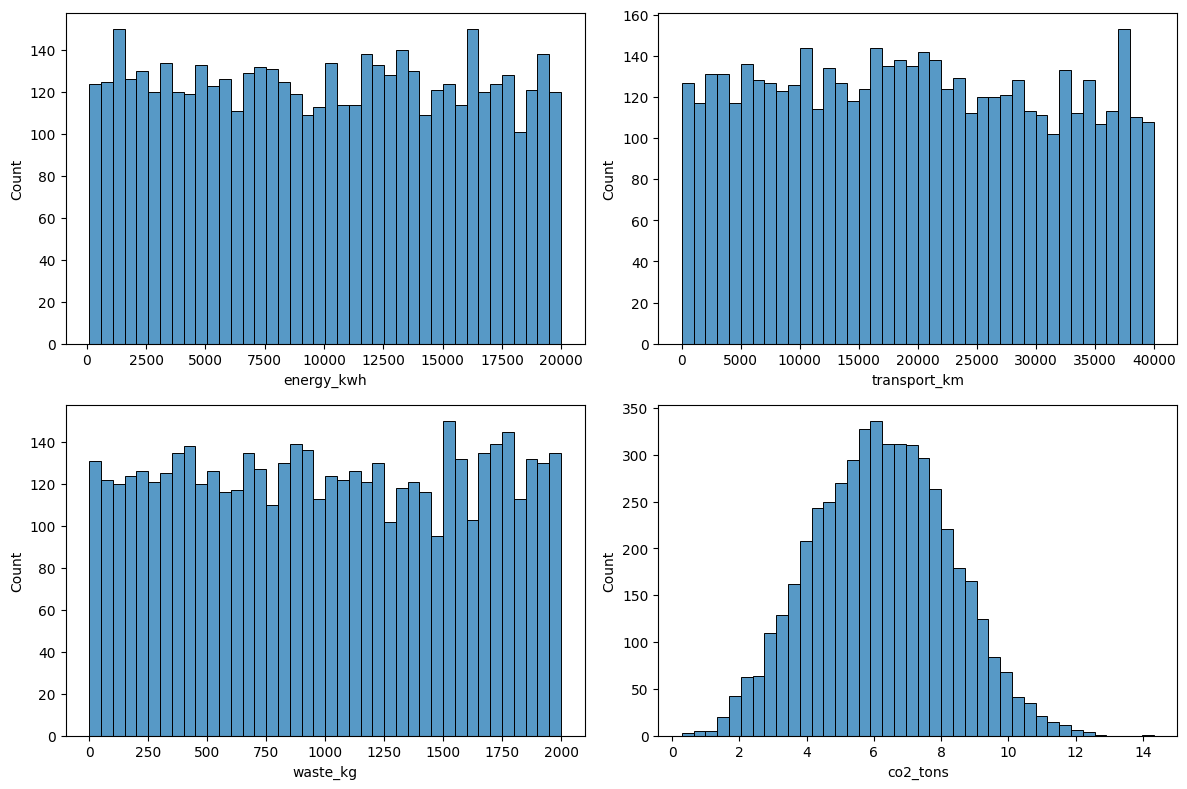

In [3]:
print(df.describe().T)

# Plot distributions
fig, axes = plt.subplots(2,2, figsize=(12,8))
sns.histplot(df['energy_kwh'], ax=axes[0,0], bins=40)
sns.histplot(df['transport_km'], ax=axes[0,1], bins=40)
sns.histplot(df['waste_kg'], ax=axes[1,0], bins=40)
sns.histplot(df['co2_tons'], ax=axes[1,1], bins=40)
plt.tight_layout()
plt.show()


In [4]:
# Features (X) and target (y)
X = df[["energy_kwh", "transport_km", "waste_kg", "flights"]]
y = df["co2_tons"]

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RND)

# Train Random Forest
model = RandomForestRegressor(n_estimators=150, random_state=RND, n_jobs=-1)
model.fit(X_train, y_train)

print("✅ Model trained successfully")


✅ Model trained successfully


Mean Absolute Error (MAE): 0.243 tons
R² Score: 0.976


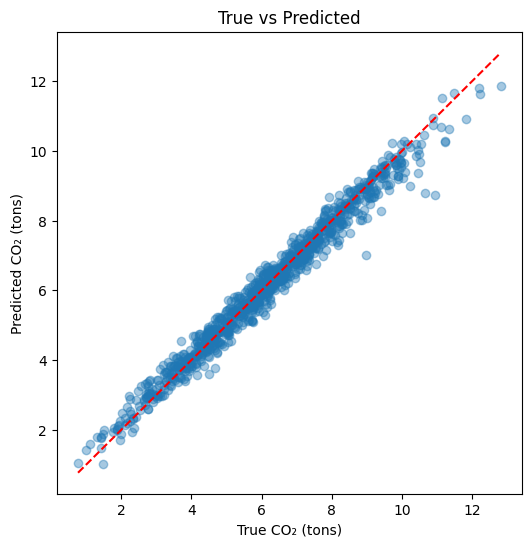

In [5]:
# Predictions
preds = model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)

print(f"Mean Absolute Error (MAE): {mae:.3f} tons")
print(f"R² Score: {r2:.3f}")

# Plot true vs predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, preds, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True CO₂ (tons)")
plt.ylabel("Predicted CO₂ (tons)")
plt.title("True vs Predicted")
plt.show()


In [6]:
joblib.dump(model, "../model/model.joblib")
print("✅ Model saved to ../model/model.joblib")



✅ Model saved to ../model/model.joblib
